In [1]:
addpath('C:\Users\Pietro\Documents\tp4-exercises\matlab')

In this approximation there are four possible states: $\ket{e,n}$, $\ket{e,n+1}$, $\ket{g,n}$, $\ket{g,n+1}$, belonging to Hilbert space $\mathcal{H}_{a}⊗\mathcal{H}_{c}$. 

The spin operators $\sigma_-$, $\sigma_+$, $\sigma_z$ act only on the first Hilbert space, while the ladder operators $a$, $a^\dag$, $N$ only on the second. The operators on the total space are therefore given by $\sigma_i⊗\mathbb{I}_{2\times2}$ and $\mathbb{I}_{2\times2}⊗a^{(\dag)}$. 

Initially, the total density operator can be represented by a $4\times4$ matrix: $\rho = \rho_{a}⊗\rho_{c}$.

The total Hamiltonian, assuming that the transition frequency of the two-level system and the cavity frequency are close and applying the rotating wave approximation, can be written as:
\begin{equation}
    H = H_a + H_c + H_{ac} = \hbar\left[\omega_0 a^\dag a + \frac{\omega_{eg}}{2}\sigma_z - \frac{\Omega_0}{2}(a\sigma_+ + a^{\dag}\sigma_-)\right]
\end{equation}
where $\omega_0$ is the cavity frequency, $\omega_{eg}$ the transition frequency and $\Omega_0$ the vacuum Rabi frequency. The dissipators are given by:
\begin{align}
\mathcal{D}[a;\rho] &= \kappa(1+n_{th})\left[a\rho a^\dag - \frac{1}{2}(a^\dag a \rho + \rho a^\dag a)\right] + \kappa n_{th}\left[a^\dag \rho a - \frac{1}{2}(a a^\dag \rho + \rho a a^\dag)\right] \\
\mathcal{D}[\sigma;\rho] &= \Gamma(1+n_{th})\left[\sigma_-\rho \sigma_+ - \frac{1}{2}(\sigma_+ \sigma_- \rho + \rho \sigma_+ \sigma_-)\right] + \Gamma n_{th}\left[\sigma_+ \rho \sigma_- - \frac{1}{2}(\sigma_- \sigma_+ \rho + \rho \sigma_- \sigma_+)\right]
\end{align}
where $n_{th}$ is the average number of thermal photons, $\kappa$ the photon loss rate and $\Gamma$ the spontaneous transition rate.

The time evolution of the system is given by the Lindblad equation:
\begin{equation}
\partial_t \rho =\mathcal{L}\rho =-\frac{i}{\hbar}\big\lbrack H,\rho \big\rbrack + \mathcal{D}[a;\rho] + \mathcal{D}[\sigma;\rho]
\end{equation}

This is solvable by vectorization:
\begin{equation}
\partial_t \rho = \mathcal{L}\ket{\rho}
\end{equation}
and the probability of the atom being in its excited state as a function of time $P_e(t)$ becomes:
\begin{equation}
P_e(t) = \braket{I|\Pi_e|\rho}, \ \Pi_e=(\ket{e}\bra{e}⊗\mathbb{I}_{2\times2})⊗(\mathbb{I}_{2\times2}⊗\mathbb{I}_{2\times2})
\end{equation}

In [2]:
% reintrouduce SI units

hbar = 1.0545718e-34;
%hbar=1;
a_rel = 3e-2; % atom relaxation time
Omega = 25e3 * 2 * pi; % Rabi frequency
f = 51.99e9; % driving frequency
c_rel = 220e-6; % cavity relaxation time
dephase = 1e3; % dephasing rate

In [3]:
Nth = 0.1;
Nss = Nth;
w0 = 2*pi*f;
w_eg = w0 + 2*pi*dephase;
G = 1/a_rel;
K = 1/c_rel;
gc = -Omega/2;

In [11]:
Nc = 50;

In [12]:
startTime = stopWatch();
id_a     = speye(2,2);                        % I atom
id_c     = speye(Nc,Nc);                      % I cavity
id0      = kron(id_a,id_c);                   % I total Hilbert space
a0       = kron(id_a,spdiags(sqrt(0:(Nc-1)).',1,Nc,Nc));  % a
a        = kron(a0,id0);                       % a  ⊗  I
at       = kron(id0,a0);                       % I  ⊗  a   (tilde-a)
id       = kron(id0,id0);                      % I  ⊗  I
aDag     = a';                                 % a† ⊗  I
atDag    = at';                                % I  ⊗  a†  (tilde-a†)
N        = aDag*a;                             % N  ⊗  I
Nt       = atDag*at;                           % I  ⊗  N   (tilde-N)
sigma_z  = kron(kron([1 0; 0 -1],id_c),id0);            % σz ⊗  I
sigma_p  = kron(kron([0 1; 0 0],id_c),id0);
sigma_m  = kron(kron([0 0; 1 0],id_c),id0);
sigma_zt = kron(id0,kron([1 0; 0 -1],id_c));           % I  ⊗  σz
sigma_pt = kron(id0,kron([0 1; 0 0],id_c));
sigma_mt = kron(id0,kron([0 0; 1 0],id_c));
stopWatch(startTime,'  [info] Fields construction in ');

  [info] Fields construction in 00:00:00.014


In [13]:
startTime = stopWatch();
% Explicit form:
L = - 1i.*(w0.*( N - Nt) + w_eg.*(sigma_z./2 - sigma_zt./2) + gc.*(a*sigma_p + aDag*sigma_m - at*sigma_pt - atDag*sigma_mt)) ...
    + K.*(1 + Nth).*( a   *at    - aDag*a./2 - atDag*at./2 ) ...
    + K.*Nth.*( aDag*atDag - a*aDag./2 - at*atDag./2 ) ...
    + G.*(1 + Nth).*( sigma_m *sigma_mt - sigma_p*sigma_m./2 - sigma_pt*sigma_mt./2 ) ...
    + G.*Nth.*( sigma_p*sigma_pt - sigma_m*sigma_p./2 - sigma_mt*sigma_pt./2 );

stopWatch(startTime,'  [info] Lindbladian construction in ');

  [info] Lindbladian construction in 00:00:00.011


In [14]:
startTime = stopWatch();
% Diagonalize
[pss,~] = eigs(L ,1,0);
[I  ,~] = eigs(L',1,0);
I = I';
% Normalize
prd = I*pss;
I   =   I./sqrt(prd);
pss = pss.*sqrt(prd)./prd;
stopWatch(startTime,'  [info] Steady-state obtained in ');
% Check for normalization
disp(['  [info] <I|pₛₛ> = ',num2str(I*pss)]);
disp(['  [info] <I|N|pₛₛ> = ',num2str(I*N*pss)]);

  [info] Steady-state obtained in 00:00:00.385
  [info] <I|pₛₛ> = 1+1.1796e-16i
  [info] <I|N|pₛₛ> = 0.1+1.6914e-17i


In [23]:
stateIdx     = 1;                 % |e,0> state index
tSpan        = [0 180e-3];       
p0           = zeros((Nc*2)^2,1);
p0(stateIdx) = 1;                 % density matrix in |e,0> state
p0           = p0./(I*p0);        % bi-normalize against left vacuum
[tVec,pT]    = ode45(@(t,v) L*v, tSpan, p0);
pT           = pT.';              % time steps as cols of pT

: 

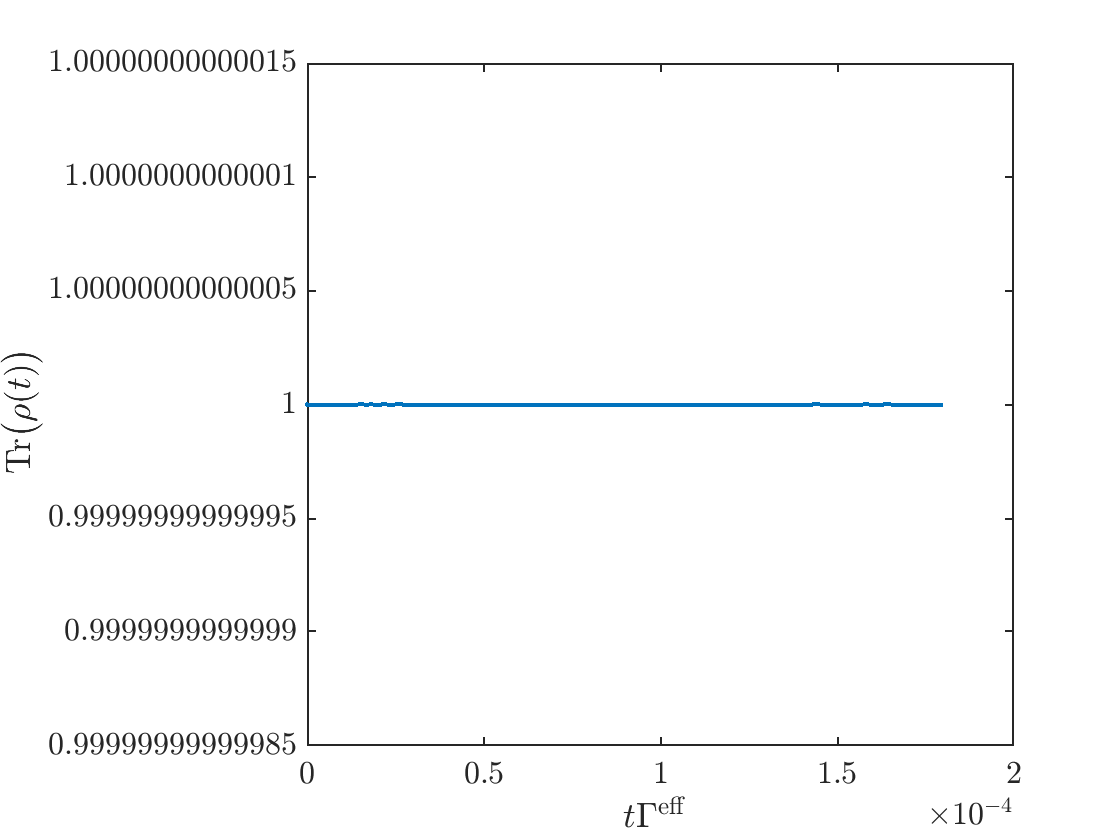

In [21]:
magicLaTeX;
figure;
plot(tVec,real(I*pT));
xlabel(' $t\Gamma^{\mathrm{eff}}$ ');
ylabel(' $\mathrm{Tr}\big(\rho(t)\big)$ ');magicLaTeX;

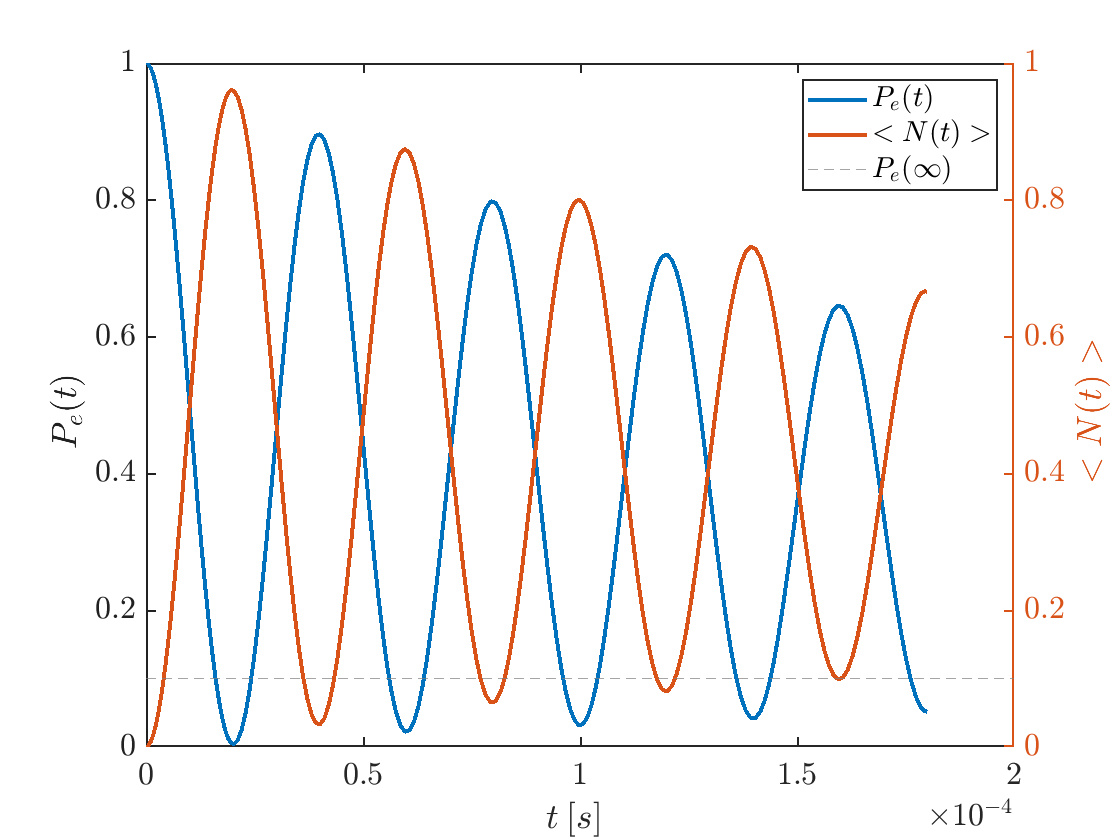

In [22]:
magicLaTeX;
figure;
ee = kron(kron([1 0; 0 0],id_c),id0);
plot(tVec,real(I*ee*pT),'DisplayName','$P_e(t)$'); hold on;
ylabel(' $P_e(t)$ ');
yyaxis right;
plot(tVec,real(I*N*pT),'DisplayName','$<N(t)>$'); hold on;
ylabel(' $<N(t)>$ ');
xlabel(' $t\: [s]$ ');
yline(Nss, '--', 'DisplayName', '$P_e(\infty)$', 'Color', [0.5 0.5 0.5]);
legend;